%conda install -c conda-forge py-pde

# Equação de Poisson

A equação de Poisson é uma equação diferencial parcial de segunda ordem. A equação é dada por:

$$\nabla^2 u(x) = f(x)$$

onde $u(x)$ é a função desconhecida e $f(x)$ é uma função dada. A equação de Poisson é uma equação diferencial parcial elíptica, que é uma equação diferencial parcial de segunda ordem na qual a curvatura de uma superfície aparece como coeficiente da função desconhecida. A equação de Poisson é uma equação diferencial parcial importante que tem aplicações em física e engenharia, especialmente em problemas de potencial eletrostático e gravitacional.

A discretização da equação de Poisson é dada por:

$$\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} = f_i$$

onde $u_i$ é a solução aproximada no ponto $x_i$ e $f_i$ é o valor da função $f(x)$ no ponto $x_i$. A equação de Poisson é uma equação diferencial parcial de segunda ordem, portanto, precisamos de duas condições de contorno para resolver a equação. As condições de contorno podem ser do tipo Dirichlet ou do tipo Neumann. Como um exemplo, as condições de contorno de Dirichlet são dadas por:

$$u(0) = 0$$

$$u(1) = 1$$

As condições de contorno de Neumann são dadas por:

$$\frac{\partial u}{\partial x}(0) = u'(0) = 0$$

$$\frac{\partial u}{\partial x}(1) = u'(1) = 0$$



Usando o pacote `py-pde`, podemos resolver a equação de Poisson em 1D, 2D e 3D. A seguir, mostramos como resolver a equação de Poisson em 1D, 2D.

Para um problema 1d em um dominio quadrado no intervalo $x \in [0,1]$, e as seguintes condições de contorno:

$$u(0) = 0$$
$$u(1) = 1$$
$$f(x) = 1$$

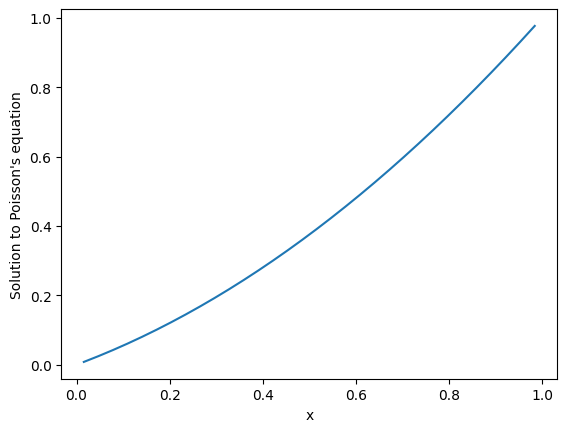

In [9]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 0}, {"value": 1}])

result.plot();

E para um problema 1d em um dominio quadrado no intervalo $x \in [0,1]$, e as seguintes condições de contorno:

$$u(0) = 0$$
$$u'(1) = 1$$
$$f(x) = 1$$

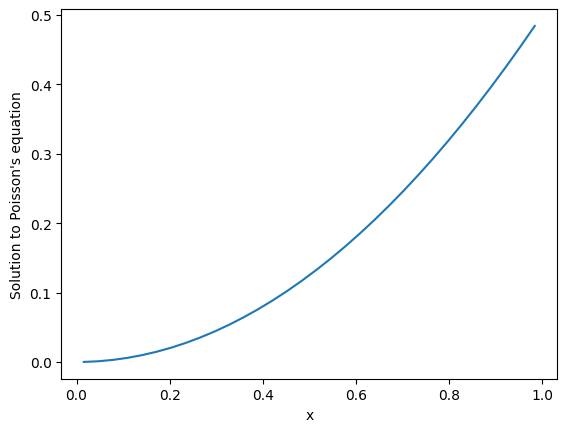

In [80]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 0}, {"derivative": 1}])

result.plot();

Para um problema 2d em um dominio quadrado no intervalo $x \in [0,1]$ e $y \in [0,1]$, e as seguintes condições de contorno:

$$u(0,y) = 0$$
$$u(1,y) = 1$$
$$u(x,0) = 0$$
$$u(x,1) = 1$$
$$f(x,y) = 1$$



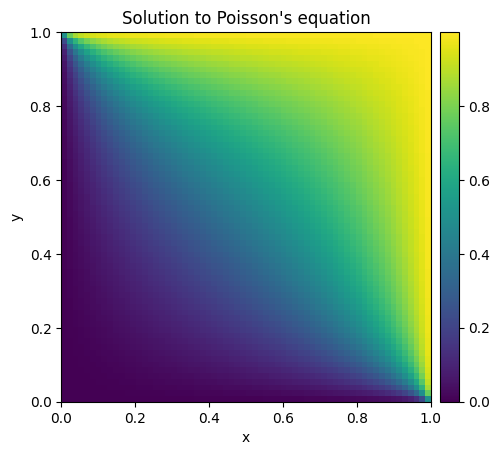

In [84]:
grid = CartesianGrid([[0, 1]] * 2, 64, periodic=False)
field = ScalarField(grid, 1)
bc_x = [{"value": 0}, {"value": 1}]
bc_y = [{"value": 0}, {"value": 1}]
bcs = [bc_x, bc_y]
result = solve_poisson_equation(field, bc=bcs)

result.plot();

E para uma condição de contorno mista:

$$u(0,y) = 0$$
$$u'(1,y) = 1$$
$$u'(x,0) = 0$$
$$u(x,1) = 1$$
$$f(x,y) = 1$$

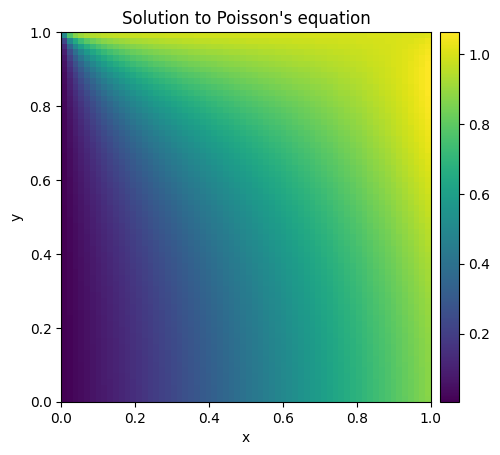

In [85]:
grid = CartesianGrid([[0, 1]] * 2, 64, periodic=False)
field = ScalarField(grid, 1)
bc_x = [{"value": 0}, {"derivative": 1}]
bc_y = [{"derivative": 0}, {"value": 1}]
bcs = [bc_x, bc_y]
result = solve_poisson_equation(field, bc=bcs)

result.plot();

# Equação de Laplace

A equação de Laplace é uma equação diferencial parcial elíptica de segunda ordem. Em duas dimensões, ela é escrita como:

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$

A solução desta equação é a função $u(x,y)$ que satisfaz a equação em todo o domínio. A equação de Laplace é uma equação de estado estacionário, ou seja, a solução não depende do tempo. A equação de Laplace é uma equação de difusão, e a solução é a distribuição estacionária de uma quantidade que se difunde no domínio. A equação de Laplace é uma equação de Poisson sem termo fonte.

A equação de Laplace é uma equação diferencial parcial linear, e portanto, a solução é a soma de soluções particulares. A solução geral é a soma de infinitas soluções particulares, e a solução geral é a soma de infinitas séries de Fourier.

Podemos resolver essa equação usando o pacote `py-pde` para um problema 2d em um dominio quadrado no intervalo $x \in [0,2\pi]$, e as seguintes condições de contorno:

$$u(0,y) = \sin(y)$$
$$u(1,y) = \sin(y)$$
$$u(x,0) = \sin(x)$$
$$u(x,1) = \sin(x)$$


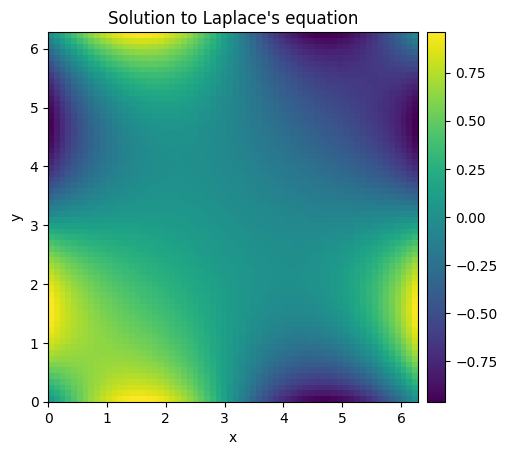

In [87]:
import numpy as np

from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]

res = solve_laplace_equation(grid, bcs)
res.plot();

E uma equação de Laplace em 2d com as seguintes condições de contorno:

$$u(0,y) = 70$$
$$u(1,y) = 100$$
$$u(x, 0) = 50$$
$$u(x, 1) = 50$$



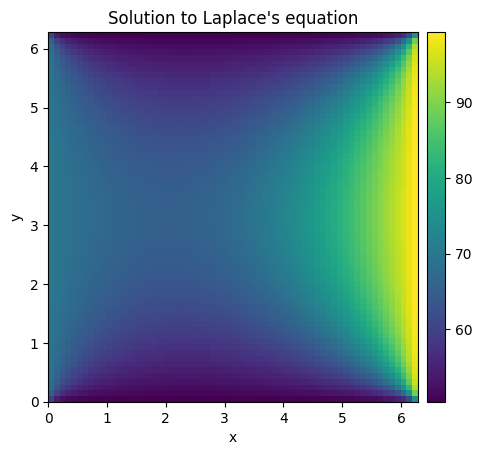

In [89]:
import numpy as np

from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)

bc_x  = [{"value": 70}, {"value": 100}]
bc_y  = [{"value": 50}, {"value": 50}]

bcs = [bc_x, bc_y]

res = solve_laplace_equation(grid, bcs)
res.plot();

# Equação de Difusão (Equação do Calor)

A equação de difusão em 1d é dada por:

$$\kappa u_{xx} = u_{t}$$

onde $\kappa$ é a difusividade e $u$ é a concentração. Em 2d e 3d, a equação é dada por:
$$\frac{\partial \Psi}{\partial t}=\kappa \triangledown^{2} \Psi$$

onde $\Psi$ é a concentração. A solução analítica para a equação de difusão em 1d é dada por:

$$u(x, t)=\frac{1}{\sqrt{4 \pi \kappa t}} \int_{-\infty}^{\infty} u_{0}\left(x^{\prime}\right) \exp \left(-\frac{\left(x-x^{\prime}\right)^{2}}{4 \kappa t}\right) d x^{\prime}$$

onde $u_{0}$ é a condição inicial. A solução analítica para a equação de difusão em 2d é dada por:

$$\Psi(x, y, t)=\frac{1}{4 \pi \kappa t} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \Psi_{0}\left(x^{\prime}, y^{\prime}\right) \exp \left(-\frac{\left(x-x^{\prime}\right)^{2}+\left(y-y^{\prime}\right)^{2}}{4 \kappa t}\right) d x^{\prime} d y^{\prime}$$

onde $\Psi_{0}$ é a condição inicial. A solução analítica para a equação de difusão em 3d é dada por:

$$\Psi(x, y, z, t)=\frac{1}{\left(4 \pi \kappa t\right)^{3 / 2}} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \Psi_{0}\left(x^{\prime}, y^{\prime}, z^{\prime}\right) \exp \left(-\frac{\left(x-x^{\prime}\right)^{2}+\left(y-y^{\prime}\right)^{2}+\left(z-z^{\prime}\right)^{2}}{4 \kappa t}\right) d x^{\prime} d y^{\prime} d z^{\prime}$$

onde $\Psi_{0}$ é a condição inicial.

Para resolver a equação de difusão em 1d, 2d e 3d, usaremos o método de diferenças finitas. A equação de diferenças finitas para a equação de difusão em 1d é dada por:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\kappa \frac{u_{i+1}^{n}-2 u_{i}^{n}+u_{i-1}^{n}}{\Delta x^{2}}$$

onde $u_{i}^{n}$ é a concentração no ponto $i$ no tempo $n$, $\Delta t$ é o passo de tempo e $\Delta x$ é o passo espacial. A equação de diferenças finitas para a equação de difusão em 2d é dada por:

$$\frac{\Psi_{i, j}^{n+1}-\Psi_{i, j}^{n}}{\Delta t}=\kappa\left(\frac{\Psi_{i+1, j}^{n}-2 \Psi_{i, j}^{n}+\Psi_{i-1, j}^{n}}{\Delta x^{2}}+\frac{\Psi_{i, j+1}^{n}-2 \Psi_{i, j}^{n}+\Psi_{i, j-1}^{n}}{\Delta y^{2}}\right)$$

onde $\Psi_{i, j}^{n}$ é a concentração no ponto $(i, j)$ no tempo $n$, $\Delta t$ é o passo de tempo, $\Delta x$ é o passo espacial na direção $x$ e $\Delta y$ é o passo espacial na direção $y$. A equação de diferenças finitas para a equação de difusão em 3d é dada por:

$$\frac{\Psi_{i, j, k}^{n+1}-\Psi_{i, j, k}^{n}}{\Delta t}=\kappa\left(\frac{\Psi_{i+1, j, k}^{n}-2 \Psi_{i, j, k}^{n}+\Psi_{i-1, j, k}^{n}}{\Delta x^{2}}+\frac{\Psi_{i, j+1, k}^{n}-2 \Psi_{i, j, k}^{n}+\Psi_{i, j-1, k}^{n}}{\Delta y^{2}}+\frac{\Psi_{i, j, k+1}^{n}-2 \Psi_{i, j, k}^{n}+\Psi_{i, j, k-1}^{n}}{\Delta z^{2}}\right)$$

onde $\Psi_{i, j, k}^{n}$ é a concentração no ponto $(i, j, k)$ no tempo $n$, $\Delta t$ é o passo de tempo, $\Delta x$ é o passo espacial na direção $x$, $\Delta y$ é o passo espacial na direção $y$ e $\Delta z$ é o passo espacial na direção $z$.

Podemos usar o pacote `py-pde` para resolver a equação de difusão em 1d, 2d e 3d. Para isso, precisamos definir a equação de difusão, a condição inicial e as condições de contorno. A equação de difusão é definida usando a função `DiffusionPDE`. A condição inicial é definida usando a função `ScalarField`. As condições de contorno são definidas usando a função `make_open_boundary`. A função `solve` é usada para resolver a equação de difusão. A função `plot` é usada para plotar a solução.

In [97]:
# resolver a equação de difusão 1D usando py-pde

import numpy as np
import matplotlib.pyplot as plt
from pde import CartesianGrid, ScalarField, DiffusionPDE, MemoryStorage, PlotTracker, ScalarField

# definir a equação de difusão
eq = DiffusionPDE(diffusivity=0.1)

# definir a grade
grid = CartesianGrid([[0, 2 * np.pi]], 64)

# definir a condição inicial
field = ScalarField.random_uniform(grid, vmin=0.1, vmax=0.2)


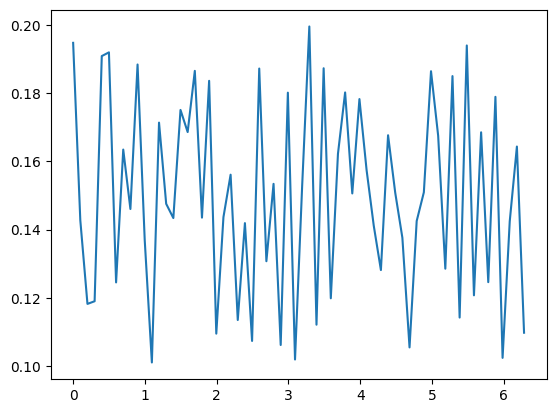

In [98]:
# a condição inicial é aleatória entre 0.1 e 0.2
plt.plot(np.linspace(0, 2 * np.pi, 64), field.data, label='t=0')

E depois de 10 segundos, a solução é dada por:

  0%|          | 0/10.0 [00:00<?, ?it/s]

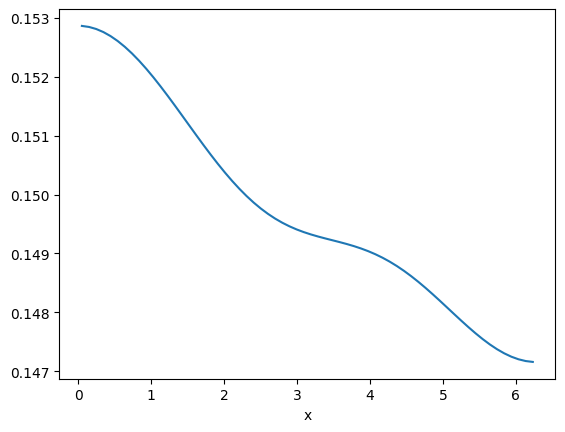

In [99]:
# resolver a equação
#result = eq.solve(state, t_range=10, dt=0.01, tracker=tracker)
result = eq.solve(field, t_range=10, dt=0.001)
# plotar o resultado
result.plot();

Agora vamos resolver o mesmo problema com uma condição inicial diferente. Agora a condição inicial não é aleatória, mas é zero em todos os lugares, exceto em um ponto onde é 1.

In [100]:
#grid = CartesianGrid([[-1, 1], [0, 2]], [30, 16])  # generate grid
grid = CartesianGrid([[-1, 1]], [30])  # generate grid
field = ScalarField(grid)  # generate initial condition
# state.insert([0, 1], 1)
field.insert([1], 1)

In [101]:
field

ScalarField(grid=CartesianGrid(bounds=((-1.0, 1.0),), shape=(30,), periodic=[False]), data=[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.])

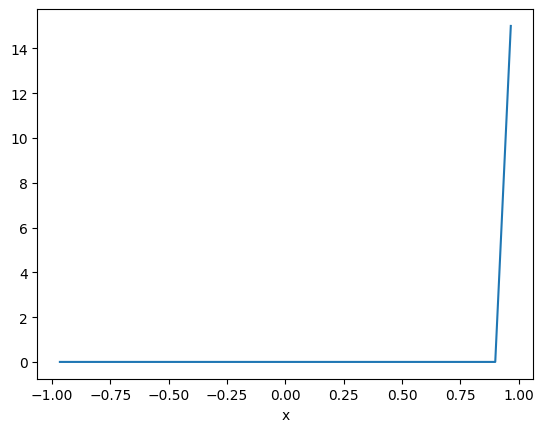

In [102]:
field.plot()

  0%|          | 0/1.0 [00:00<?, ?it/s]

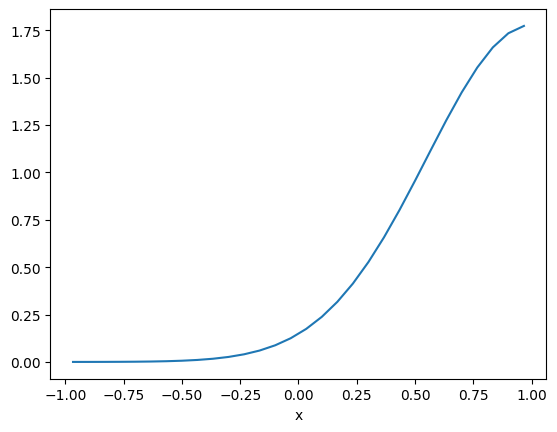

In [103]:
eq = DiffusionPDE(0.1)  # define the pde
result = eq.solve(field, t_range=1, dt=0.01)
result.plot()

In [104]:
import numpy as np
from pde import CartesianGrid, DiffusionPDE, ScalarField
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = np.linspace(0.0, L, num=nx)
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

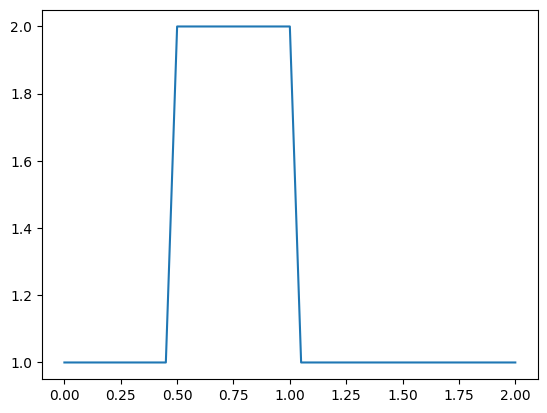

In [93]:
plt.plot(np.linspace(0., 2., nx), u0, label='t=0');

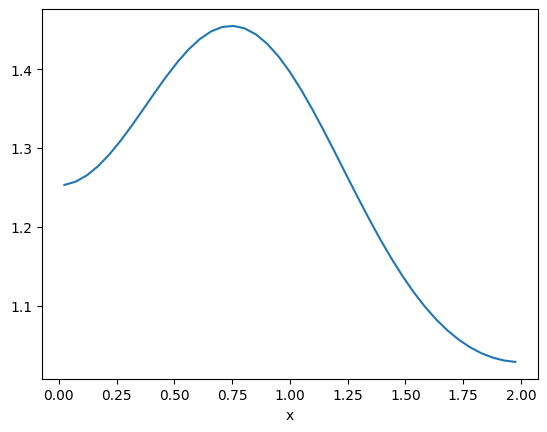

In [105]:
import pde
grid = CartesianGrid([[0, L]], [nx])  # generate grid
field = ScalarField(grid, data=u0)  # generate initial condition
eq = DiffusionPDE(0.01)  # define the pde
storage = pde.MemoryStorage()
result = eq.solve(field, t_range=10, dt=0.001, tracker=storage.tracker(1))
result.plot();

E depois de 100 segundos

  0%|          | 0/100.0 [00:00<?, ?it/s]

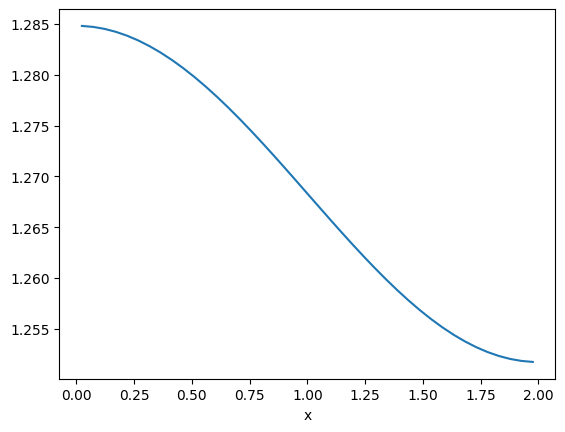

In [51]:
state = ScalarField(grid, data=u0)  # generate initial condition
eq = DiffusionPDE(0.01)  # define the pde
storage = pde.MemoryStorage()
result = eq.solve(state, t_range=100, dt=0.001, tracker=["progress", storage.tracker(1)])
#result = eq.solve(state, t_range=100, dt=0.001, tracker=["plot", storage.tracker(1)])
result.plot();

In [95]:
pde.movie(storage, filename='./outputs/difusao.mp4')

  0%|          | 0/11 [00:00<?, ?it/s]

A gente consegue definir uma equação diferencial parcial usando a função `PDE`. Por exemplo, vamos definir a equação de difusão em 1d usando a função `PDE`.

  0%|          | 0/10.0 [00:00<?, ?it/s]

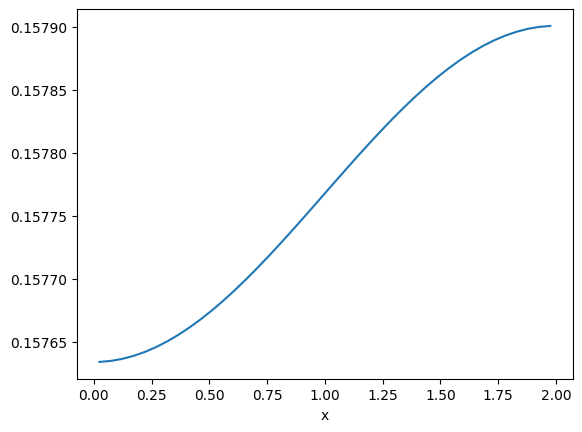

In [96]:
# definir a equação de difusão usando a função `PDE`
eq = pde.PDE({"u": "D*laplace(u)"}, consts={"D": 0.1})

# definir a condição inicial
field = ScalarField.random_uniform(grid, vmin=0.1, vmax=0.2)

# resolver a equação
result = eq.solve(field, t_range=10, dt=0.01)
# plotar o resultado
result.plot();

Agora vamos resolver a equação de difusão em 1d com condições de contorno mais complexo

In [62]:
bc_lower = {"value": 4}
bc_upper = {"value": 2}
bc = [bc_lower, bc_upper]

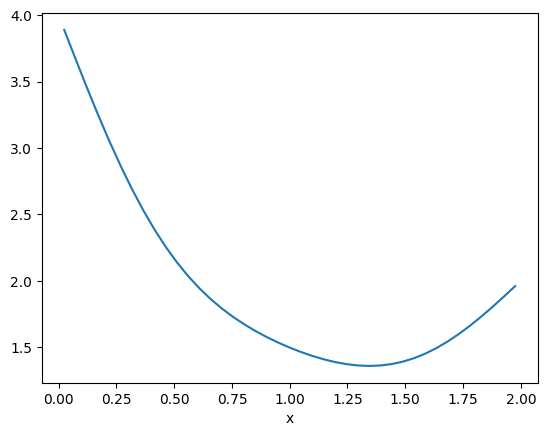

In [70]:
grid = CartesianGrid([[0, L]], [nx])  # generate grid
field = ScalarField(grid, data=u0)  # generate initial condition
eq = DiffusionPDE(0.01, bc=bc)  # define the pde
storage = pde.MemoryStorage()
result = eq.solve(field, t_range=10, dt=0.001, tracker=storage.tracker(1))
result.plot();

## Equação de Convecção 

A equação de convecção é dada por:

$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=0$$

onde $u$ é a velocidade e $x$ é a posição. A equação de convecção é uma equação diferencial parcial não linear que descreve um fenomeno de transporte.

A discritização da equação de convecção é dada por:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+u_{i}^{n} \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}=0$$

onde $u_{i}^{n}$ é a velocidade no ponto $i$ no tempo $n$, $\Delta t$ é o passo de tempo e $\Delta x$ é o passo espacial.

Vamos resolver essa equação para um caso simples onde a velocidade é constante e igual a 1. A condição inicial é dada por:

$$u(x, 0)=\left\{\begin{array}{ll}{2} & {\text { if } 0.5 \leq x \leq 1} \\ {1} & {\text { otherwise }}\end{array}\right.$$

As condições de contorno são dadas por:

$$u(0, t)=1$$

$$u(2, t)=1$$





In [30]:
import numpy as np
import pde
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField

nx = 1051  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.001  # time-step size
x = np.linspace(0.0, L, num=nx)
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

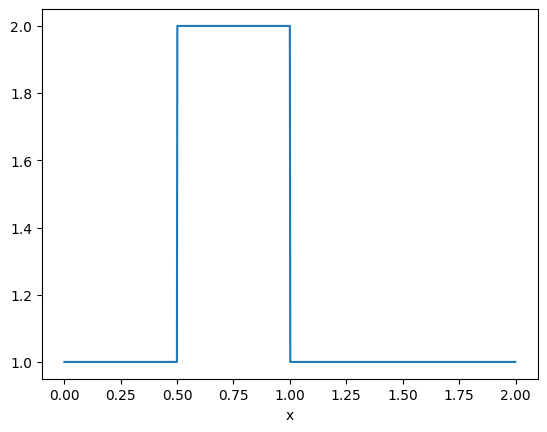

In [31]:
grid = CartesianGrid([[0., 2.]], nx)
field = ScalarField(grid, data=u0)
field.plot();

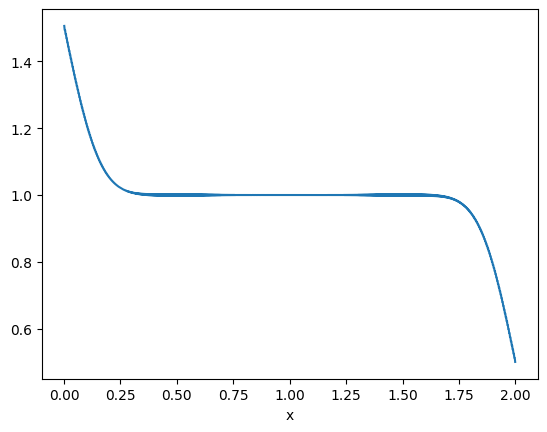

In [32]:
eq = PDE({"u": "-d_dx(u)"})

# solve the equation and store the trajectory
storage = MemoryStorage()
res = eq.solve(field, t_range=15, tracker=storage.tracker(0.1), 
             dt=dt, 
             method='implicit',
             )

# plot the trajectory as a space-time plot
res.plot()

Como dá para ver o resultado é muito estranho. Este é devido ao erro numerico dos metodos de diferenças finitas. Para resolver esse problema, precisamos usar um método de diferenças finitas de alta ordem.

In [8]:
pde.movie(storage, filename='./outputs/conveccao.mp4')

  0%|          | 0/151 [00:00<?, ?it/s]

Como 